In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Slicing and Parsing
#
##########################################################################################

In [1]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a suffix:  
#       BIOS6644_CSV_Sugar_Metabolomics_FirstLast.ipynb
#    2) Do all work in this new notebook.
#    3) Place completed work in students/Module_1/Your_Name
#    4) Push to your branch on GitHub to submit
#
##################################################################################################################


# Wrangling Sugar Metabolomics Data


In [1]:

import pandas as pd
import pylab as plt
import numpy as np
%matplotlib notebook

In [75]:


# General info here:
#   https://data.mendeley.com/datasets/9z7ncwvxnz/1
#
# Data here:
#   https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/9z7ncwvxnz-1.zip

# I renamed mine to "sugar_metabolomics.csv" so I could remember what it is
data = '../../../../BIOS6644_Spring_2024/Modules/Module_1/Data/sugar_metabolomics.csv'


In [76]:
##################################################################################################################
#
# YouDo:
# 
#    1) Read the csv into a dataframe called df
#######################################  BEGIN STUDENT CODE  #####################################################

# 1) read csv

df = pd.read_csv(data)

#######################################   END STUDENT CODE   #####################################################


In [77]:
##################################################################################################################
#
# YouDo:
# 
#    1) Notice that the import is wonky -- examine the data set
#       manually and figure out how to make it import cleanly.
#      
#       Ensure your data frame has the following handled correctly
#         a) the column names (1st row of the csv)
#.        b) The unlabeled first column is read as an index
#         c) The final row is totally weird--don't import it
#
#       (hint: pd.read_csv? lists various import options)
#
#######################################  BEGIN STUDENT CODE  #####################################################

# 1)
# pd.read_csv?
#use index_col,  header, and skipfooter for last row
df = pd.read_csv(data, header =0, index_col = 0, skipfooter =1, engine = 'python') #warning says to add engine = python

#######################################   END STUDENT CODE   #####################################################
assert df.shape == (92, 132)

In [78]:
##################################################################################################################
#
# YouDo:
# 
#    1) Get rid of any columns that have only NaN values
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
#
#######################################  BEGIN STUDENT CODE  #####################################################

df= df.dropna(axis = 'columns', how = 'all')

#######################################   END STUDENT CODE   #####################################################

assert df.shape == (92, 125)


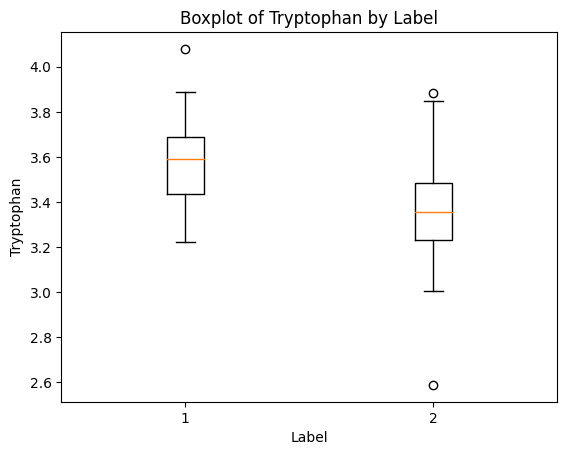

In [79]:
##################################################################################################################
#
# YouDo:
# 
#    1) Generate boxplots of Tryptophan levels separated based on 
#        the "Label" value
#
#      Use whatever plotting library you like.   
#      Hint 1: matplotlib has a boxplot tool
#          help(plt.boxplot)
#      Hint 2: pandas data frames have a built-in boxplot tool
#          help(df.boxplot)
#
#######################################  BEGIN STUDENT CODE  #####################################################
import matplotlib.pyplot as plt
%matplotlib inline  
#plots would not show, had to add this line.

# help(plt.boxplot)
# Separate data for each group based on 'Label'
group_0 = df[df['Label'] == 0]['Tryptophan']
group_1 = df[df['Label'] == 1]['Tryptophan']

# Create boxplot
plt.boxplot([group_0, group_1])
plt.xlabel('Label')
plt.ylabel('Tryptophan')
plt.title('Boxplot of Tryptophan by Label')
plt.show()

#######################################   END STUDENT CODE   #####################################################


(124, 124)


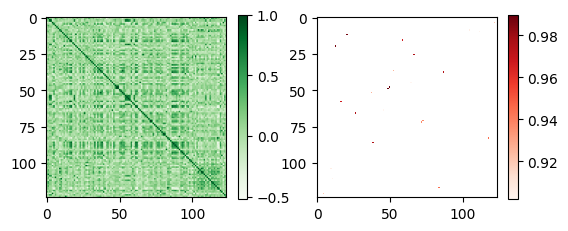

In [80]:
##################################################################################################################
#
# YouDo:
# Make a pair of plots as follows:
#    1) Show the correlation matrix between columns of the data
#        (hint 1: it should be 124x124, hint 2: check out plt.imshow() 
#         Hint 2: numpy has a function for generating the correlation matrix)
#
#    2) Make a similar plot showing correlation > 90%
#
#  Stretch goal:  using plt.subplot()  make a single figure with both plots side-by-side
#
#######################################  BEGIN STUDENT CODE  #####################################################
#found numpy function for correlation matrix.
# np.corrcoef?

corr = np.corrcoef(df, rowvar=False)
#per documentaion, rowvar=false to use columns as the variables.
corr

#check shape is 124x124
#print(corr.shape)

# hmmm... i got 125x125. think need to not include label variable which is 0/1
df_corr = df.iloc[: , 1:]
#from https://sparkbyexamples.com/pandas/pandas-drop-first-column-from-dataframe/

# corr_matrix = np.corrcoef(df_corr, rowvar= False)
# corr_matrix

#hmmm..for some reason numpy correlation causes nan after removing 1st column, cannot figure out why, using pandas seems to work
#per https://stackoverflow.com/questions/31619578/numpy-corrcoef-compute-correlation-matrix-while-ignoring-missing-data
#numpy corrcoef is not nan friendly but pandas is.
corr2 = df_corr.corr()
print(corr2.shape)
#matrix is 124 x 124

# use plt.imshow to plot the correlation matrix
# plt.imshow?
%matplotlib inline  
plt.subplot(1,2,1)   #1 row, 2 columns, 1st plot
corr_plot = plt.imshow(corr2,cmap= 'Greens')
#get colorbar legend
plt.colorbar(corr_plot,shrink= 0.5)
# plt.colorbar?
#make a plot where correlation is >90%
corr_90 = corr2[abs(corr2 )> 0.90]
# #going to fill diagonal since this is autocorrelation
np.fill_diagonal(corr_90.values, np.nan)
#took code inspiration from: https://stackoverflow.com/questions/35405222/pandas-how-to-drop-self-correlation-from-correlation-matrix

plt.subplot(1,2,2)
corr90_plot = plt.imshow(corr_90, cmap= 'Reds',interpolation= 'none')
plt.colorbar(corr90_plot, shrink = 0.5)
plt.show()

#######################################   END STUDENT CODE   #####################################################

In [91]:
##################################################################################################################
#
# YouDo:
#  1) Remove any rows with na values
# 
#  2) Split the data into "test" and "train" bits with ~30% in the test set.
#       The "Label" column is the "y" data.  All other columns are the "X" data
#       Give them these names:
#       X_train, X_test, y_train, y_test

#######################################  BEGIN STUDENT CODE  #####################################################

# 1)
df2 = df.dropna(axis = 0)

#2)
y = df2.pop('Label')
X = df2
# print(y)
# print(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#code inspo from:https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
#######################################   END STUDENT CODE   #####################################################


(53, 124)
(24, 124)
(53,)
(24,)


In [94]:
#Build a model to classify the Label based on the other columns

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=8675309)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=8675309)

In [95]:
# Test the model
predictions = clf.predict(X_test)
reality = y_test

In [108]:
# YouDo:
#  1) Evaluate the "goodness" of the predictions and write a paragraph describing the results as a markdown.
#
#######################################  BEGIN STUDENT CODE  #####################################################
# accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score= accuracy_score(y_test, predictions)
print(f"Accuracy score:  {accuracy_score}")
# View the classification report for test data and predictions
print(f"Classification report:\n {classification_report(y_test, predictions)}")

#insp from: https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
#######################################   END STUDENT CODE   #####################################################


Accuracy score:  0.875
Classification report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.84      0.91        19

    accuracy                           0.88        24
   macro avg       0.81      0.92      0.84        24
weighted avg       0.92      0.88      0.88        24



# Analysis
It goes here.

The accuracy for the model was 0.88 on the test data, which essentially means the percent of label predictions that were correct.
Precision measures the proportion of true positive predictions among all the positive predictions made, rightly or wrongly. 
For label 0, 62% of the samples predicted as label 0 are actually label 0, while all samples predicted as label 1 are indeed label 1.
Recall measures the proportion of true positive predictions among all actual true positives of that class. For label 0, the recall is 1, 
indicating that all actual label 0 predictions were correctly predicted. For label 1, the recall is 0.84, meaning that 84% of the actual 
label 1 predictions were correctly predicted. The F1 score combines precision and recall.  If both are high, then F1 will be high, as seen
with label 1. If either is low than the F1 score is lower, as seen with label 0. Overall, this model has good accuracy but does have 
higher false positives for the 0 label whereas, it does a pretty good job at predicting label 1, with 84% recall, meaning it may have missed 
some label 1 predictions.